# Multiple Comparisons
- post hoc procedure: further comparisons after significant result from overall One-way ANOVA
- If the result for One-way ANOVA is good enough, i.e.some pairs are evidently true, we may omit some pairs to remove the number of tests
- Max of $G \choose 2$ pairwise comparisons
- Major issue: increased chance of making at least one Type I error when carrying out many tests, $E(\#errors)=\#tests \times \alpha$
- Two common solutions: based on controlling family Type I error rate, choose 
 - Bonferroni
 - Tukey's

_**Example**_
$P(\text{committing at least 1 Type I error})$ ?
- For n independent tests: $P = 1-(1-\alpha)^n$

## Bonferroni's Method
- Based on Bonferroni's inequality $P(A\cup B) \leq P(A)+P(B)$, hence $P(\cup A_i)\leq \sum P(A_i), A_i:=$ the event that $i$th test results in a Type I error. 
- Method: conduct each of $k=G \choose 2$ pairwise tests at level $\alpha / k$
- CI: $|\bar{y}_i - \bar{y}_j|\pm t_{\alpha/2k} S_p \sqrt{n_i^{-1} + n_j^{-1}}$ 
- Conservative: overall Type I error rate is usually much less than $\alpha$ if tests are not mutually independent. 
- Type II error inflation.

## Tukey's Approach
- Usually less conservative than Bonferroni, particularly if group sample size are similar. Controls the overall Type I error rate of $\alpha$, simultaneous CI converage rate is $1-\alpha$. 

### Studentized Range distribution
- $\mathcal{X}= \{X_1,...,X_n\}, X_i\in N(\mu,\sigma^2)$. Determine the distribution of the max and min of $\mathcal{X}$. 
- $X_{(n)}:=\max{\mathcal{X}}, X_{(1)};=\min{\mathcal{X}}$, Range $:= X_{(n)}-X{(1)}$
- Based on $n$ observations from $X$, the Studentized range statistic is $Q_{stat} = Range / s, s=$ sample std. 
- Based on $G$ group means, with $n$ observations per group: $$\bar{Q}_g = \frac{\sqrt{n}(\bar{y}_{(g)} - \bar{y}_{(1)})}{s_v}$$
$s_v$ estimator of the pooled std. $v=N-G=G(n-1)$ d.f. 

- If there are $G$ groups, then there is a max of $k$ pairwise differences
- Controlling overall simultaneous Type I error rate v.s. Individual Type I error rate
- Find a pairwise significant difference
 - Compare method-wise significant difference, $c(\alpha)$ with $|\bar{y}_i - \bar{y}_j|$ OR 
 - determine whether CI contains 0 OR 
 - Compare $p$ with $\alpha$
- $s=\sqrt{MSE}$ with d.f. $=v=d.f.Error$

### Tukey's Honestly Significant Difference (HSD) 
- let $q(G,v,\alpha)/t^*:=$ the critical value from the Studentized Range distribution. 
- Family rate $=\alpha$
- Tukey's HSD $=q(G,v,\alpha) \frac{s}{\sqrt{n}}$

# Case Study
Bonferroni
 - $H_0:\mu_i - \mu_j = 0, H_a: \mu_i\neq \mu_j$  
 - $t = \frac{\bar{x}_i - \bar{x}_j}{S_p \sqrt{n_i^{-1} + n_j^{-1}}}$
 - $p = 2P(T_{\alpha/2k}> |t|)$

In [1]:
# import data
library(Sleuth2)
jury = case0502
percent = case0502$Percent
judge = case0502$Judge

In [2]:
judge = relevel(judge, ref="Spock's")
pairwise.t.test(percent, judge, p.adj='bonf')


	Pairwise comparisons using t tests with pooled SD 

data:  percent and judge 

  Spock's A       B       C       D       E      
A 0.00022 -       -       -       -       -      
B 0.00013 1.00000 -       -       -       -      
C 0.00150 1.00000 1.00000 -       -       -      
D 0.57777 1.00000 1.00000 1.00000 -       -      
E 0.03408 1.00000 1.00000 1.00000 1.00000 -      
F 0.01254 1.00000 1.00000 1.00000 1.00000 1.00000

P value adjustment method: bonferroni 

In [3]:
# CI
lmod=lm(percent~judge)
confint(lmod, level = 1- 0.05/nlevels(judge))

,0.357 %,99.643 %
(Intercept),8.078085,21.16636
judgeA,8.547341,30.44821
judgeB,8.647254,29.34163
judgeC,5.222969,23.73259
judgeD,-2.969585,27.72514
judgeE,1.997255,22.69163
judgeF,2.922970,21.43259


In [4]:
amod = aov(percent~judge)
hsd = TukeyHSD(amod, 'judge')
hsd

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = percent ~ judge)

$judge
                 diff        lwr       upr     p adj
A-Spock's 19.49777727   7.514685 31.480870 0.0001992
B-Spock's 18.99444405   7.671486 30.317402 0.0001224
C-Spock's 14.47777732   4.350216 24.605339 0.0012936
D-Spock's 12.37777758  -4.416883 29.172438 0.2744263
E-Spock's 12.34444443   1.021486 23.667402 0.0248789
F-Spock's 12.17777766   2.050216 22.305339 0.0098340
B-A       -0.50333322 -13.512422 12.505755 0.9999997
C-A       -5.01999995 -17.003092  6.963092 0.8470098
D-A       -7.11999969 -25.094638 10.854639 0.8777485
E-A       -7.15333284 -20.162421  5.855755 0.6146239
F-A       -7.31999961 -19.303092  4.663093 0.4936380
C-B       -4.51666673 -15.839625  6.806291 0.8742030
D-B       -6.61666648 -24.158118 10.924785 0.9003280
E-B       -6.64999962 -19.053679  5.753679 0.6418003
F-B       -6.81666639 -18.139624  4.506292 0.5109582
D-C       -2.09999975 -18.894661

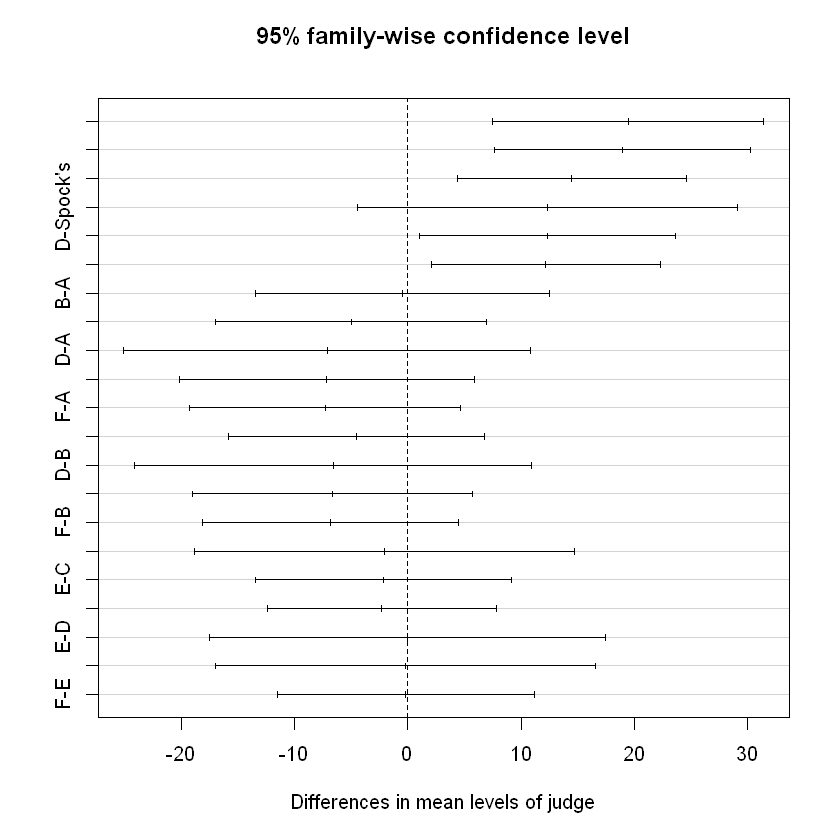

In [5]:
plot(hsd)

# Linear Regression Model 
 - $Y_{N\times 1}=X_{N\times(p+1)}\beta_{(p+1)\times 1} + \epsilon_{N\times 1}$, response $Y$ continuous, explanatory $X$ categorical and/or continuous 
 - $Y$ is linear in the $\beta$'s i.e. no predictor is a linear function or combination of other predictors
 - $\hat{\beta}=(X'X)^{-1}X'Y$ Least square Estimate, need$rank(X'X)=rank(X)\Rightarrow$ columns of $X$ must be linear independent
 - Null hypothesis $H_0: \beta = \vec{0}$. Assumptions
  - Appropriate Linear Model
  - Uncorrelated Errors
  - $\vec{\epsilon}\sim N(\vec{0},\sigma^2I)$. 
 - Sum of Squares Decomposition 
 $$SST=SSE+SSR\\
 \sum_i^N(Y_i-\bar{Y})^2 = \sum_i^N (Y_i-\hat{Y}_i)^2 + \sum_i^N(\hat{Y}_i - \bar{Y})^2$$
 

# One-Way ANOVA
- Need one factor (categorical variable) with at least 2 levels $(G\geq 2)$
- Aim: Compare $G$ group means
    $$H_0:\mu_1=\mu_2=...=\mu_G, H_a:\exists i\neq j. \mu_i\neq \mu_j$$
- Predictors are indicator variables that classify the observations one way (into $G$ groups)
 - special case of a general linear model
 - equivalent to GLM with one-way classification (one factor)
 - GLM uses $G-1$ dummy variables
- ANOVA: compare means by analyzing variability

# One Way Expectations and Estimates

$E(Y_i)=(\beta_0 + \beta_1,...,\beta_0 +\beta_{G-1}, \beta_0)^T$ <br>
$\hat{Y}_i = (b_0+b_1,...,b_0 + b_{G-1}, b_0)^T$ <br>
$\hat{\beta} = (b_0,...,b_{G-1})^T = (\bar{y}_G, \bar{y}_1-\bar{y}_G,...,\bar{y}_{G-1}-\bar{y}_G)^T$

Then, the null hypothesis is $H_0: \beta_i=\mu_i-\mu_0 = 0\Rightarrow$ the equal mean of $i$th group and the compared group

In this case, for $SST$, $N=\sum_1^G n_i,\hat{Y}_i=$ mean of observations for group $g$ from which the $i$th observation belongs, $\bar{Y}=\frac{\sum_{g=1}^{G}\sum_{j=1}^{n_g} y_{gj}}{N}$ is the grand mean 

$$SSReg = \sum_{g=1}^G n_g(\bar{Y}_g-\bar{Y})^2 \\
RSS = \sum_{g=1}^G \sum_{g} (Y_i-\bar{Y}_g)^2$$

In [6]:
# import data
library(Sleuth2)
jury = case0502
percent = case0502$Percent
judge = case0502$Judge

In [7]:
table(judge)

judge
Spock's       A       B       C       D       E       F 
      9       5       6       9       2       6       9 

In [8]:
with(jury, tapply(percent, judge, mean))

Spock's        A        B        C        D        E        F 
14.62222 34.12000 33.61667 29.10000 27.00000 26.96667 26.80000

## Compare 6 judges (exclude Spock)

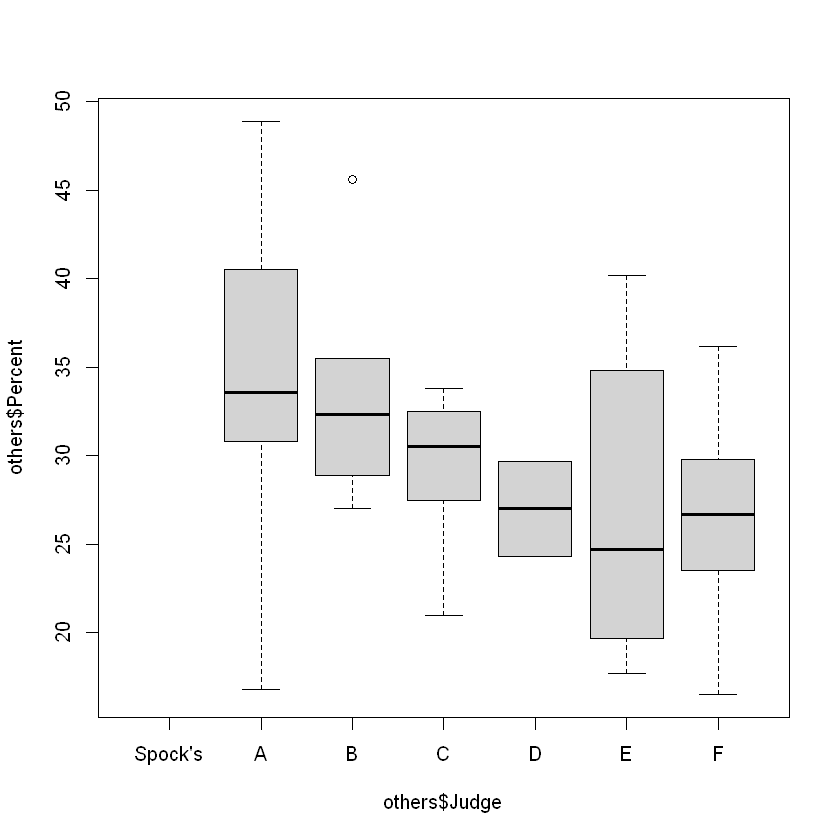

In [9]:
others = subset(jury, judge != "Spock's") 
boxplot(others$Percent~others$Judge, data=others)

In [10]:
summary(aov(others$Percent~others$Judge))

             Df Sum Sq Mean Sq F value Pr(>F)
others$Judge  5  326.5   65.29   1.218  0.324
Residuals    31 1661.3   53.59               

## Rule of thumb
Not a formal way, not a quick check whether equal variance

In [11]:
sss <- with(others, tapply(others$Percent, others$Judge, sd))
sss

Spock's         A         B         C         D         E         F 
       NA 11.941818  6.582223  4.592929  3.818378  9.010142  5.968878

In [13]:
max(sss, na.rm=T); min(sss, na.rm=T)

[1] 11.94182

[1] 3.818378

In [14]:
max(sss, na.rm=T) / min(sss, na.rm=T) > 2

[1] TRUE

In [15]:
bartlett.test(others$Percent, others$Judge)


	Bartlett test of homogeneity of variances

data:  others$Percent and others$Judge
Bartlett's K-squared = 6.3125, df = 5, p-value = 0.277


The small p-value may due to the uneven and small group sizes

## Compare all 7 judges

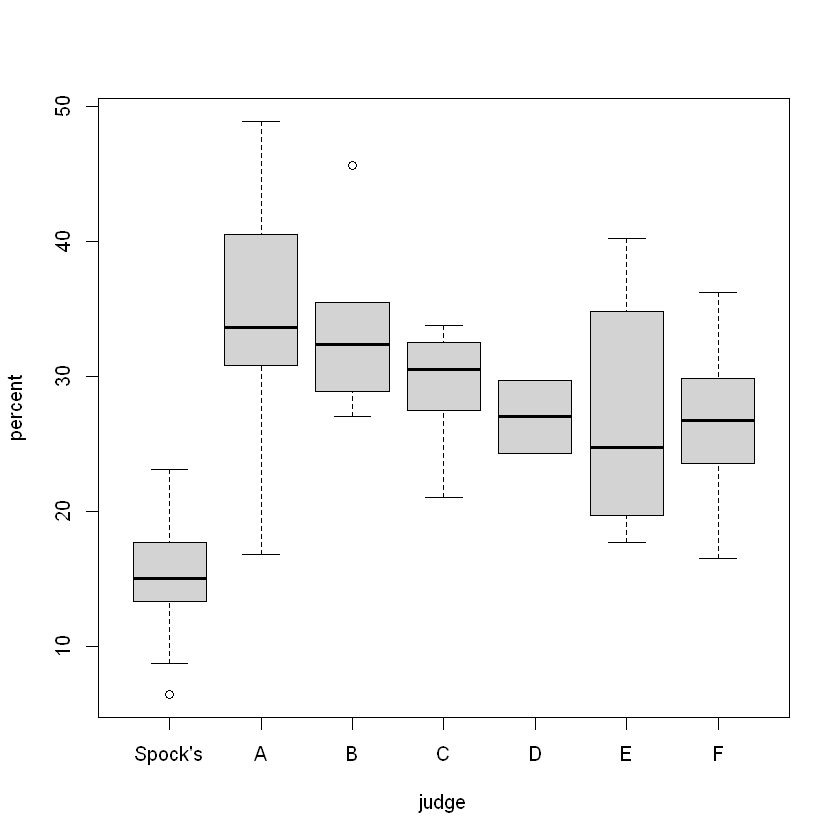

In [16]:
boxplot(percent~judge)

In [17]:
summary(aov(percent~judge))

            Df Sum Sq Mean Sq F value  Pr(>F)    
judge        6   1927   321.2   6.718 6.1e-05 ***
Residuals   39   1864    47.8                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [18]:
summary(lm(percent~judge))


Call:
lm(formula = percent ~ judge)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.320  -4.367  -0.250   3.319  14.780 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   14.622      2.305   6.344 1.72e-07 ***
judgeA        19.498      3.857   5.056 1.05e-05 ***
judgeB        18.994      3.644   5.212 6.39e-06 ***
judgeC        14.478      3.259   4.442 7.15e-05 ***
judgeD        12.378      5.405   2.290 0.027513 *  
judgeE        12.344      3.644   3.388 0.001623 ** 
judgeF        12.178      3.259   3.736 0.000597 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.914 on 39 degrees of freedom
Multiple R-squared:  0.5083,	Adjusted R-squared:  0.4326 
F-statistic: 6.718 on 6 and 39 DF,  p-value: 6.096e-05


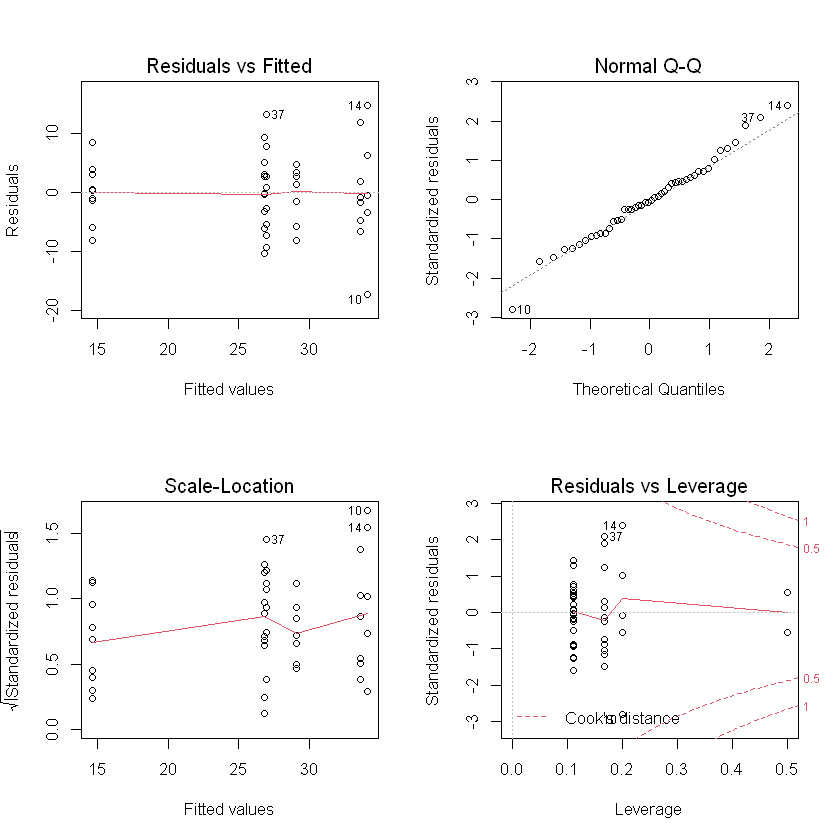

In [19]:
par(mfrow=c(2,2))
plot(lm(percent~judge))

In [20]:
ssa = with(jury, tapply(percent,judge,sd))
ssa

Spock's         A         B         C         D         E         F 
 5.038794 11.941818  6.582223  4.592929  3.818378  9.010142  5.968878

In [21]:
max(ssa) / min(ssa) > 2

[1] TRUE

In [22]:
bartlett.test(percent~judge)


	Bartlett test of homogeneity of variances

data:  percent by judge
Bartlett's K-squared = 7.7582, df = 6, p-value = 0.2564


- Residual vs Fitted: No obvious pattern, assume equal variance (also by rule of thumb and Bartlett)
- Normal Q-Q: overall OK
- Outliers: see Residual vs leverage, not influential point. 

![png](./assets/normalqq.png)